In [118]:
import time
import numpy as np
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import feather 
from mailerWithUtf8 import mail
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.optimizers import SGD

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# preprocess load data

In [106]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train.feather' 
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_train_sample.feather' 
train_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))


load feather %s seconds 1.4539523124694824


In [107]:
start_time = time.time()
path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test.feather'
# path = 'C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/0710_marketing_test_sample.feather' 

test_df = feather.read_dataframe(path)
print('load feather %s seconds', format(time.time() - start_time))

load feather %s seconds 0.36011457443237305


In [108]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [109]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

In [110]:
train_x = train_x.reshape(train_x.shape[0], -1)   # normalize
test_x = test_x.reshape(test_x.shape[0], -1)   # normalize



In [111]:
# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# y_train = encoder.fit_transform(y_train)
# y_test = encoder.fit_transform(y_test)

In [112]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(train_y)
encoded_Y = encoder.transform(train_y)
# convert integers to dummy variables (i.e. one hot encoded)
train_y = np_utils.to_categorical(encoded_Y)

encoded_Y = encoder.transform(test_y)
# convert integers to dummy variables (i.e. one hot encoded)
test_y = np_utils.to_categorical(encoded_Y)

In [113]:
# get y unique name
encoder.classes_

array(['Adult', 'Game', 'HomeLife', 'Infrequent Internet User',
       'InstantMessage-High', 'InstantMessage-Low', 'Map', 'News',
       'No significant preference', 'Portal', 'Social-media'], dtype=object)

In [114]:
len(train_y)

1506103

In [115]:
len(test_y)

376526

# construct and compile model

In [116]:
classify_num = 11
epochs = 300
batch = 128

# basic config

In [119]:
start_time = time.time()
print ('Compiling Model ... ')
model = Sequential()
model.add(Dense(1024, input_shape=train_x[0].shape ))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(classify_num))
model.add(Activation('softmax'))

# rms = RMSprop()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])


print('Model compield in {0} seconds'.format(time.time() - start_time))


Compiling Model ... 
Model compield in 0.12235522270202637 seconds


# Train model

In [120]:
start_time = time.time()
print('Training model...')
model.fit(train_x, train_y , epochs=epochs, batch_size=batch,
          shuffle=True,validation_split=0.1, verbose=2)
print("Training duration : {0}".format(time.time() - start_time))


Training model...
Train on 1355492 samples, validate on 150611 samples
Epoch 1/300
53s - loss: 1.9794 - acc: 0.2882 - val_loss: 1.9575 - val_acc: 0.2925
Epoch 2/300
54s - loss: 1.9482 - acc: 0.2959 - val_loss: 1.9410 - val_acc: 0.3000
Epoch 3/300
54s - loss: 1.9324 - acc: 0.2987 - val_loss: 1.9274 - val_acc: 0.2969
Epoch 4/300
57s - loss: 1.9175 - acc: 0.3018 - val_loss: 1.9136 - val_acc: 0.3039
Epoch 5/300
55s - loss: 1.9104 - acc: 0.3032 - val_loss: 1.9157 - val_acc: 0.3025
Epoch 6/300
54s - loss: 1.9050 - acc: 0.3048 - val_loss: 1.9138 - val_acc: 0.3035
Epoch 7/300
55s - loss: 1.8997 - acc: 0.3064 - val_loss: 1.9170 - val_acc: 0.3023
Epoch 8/300
55s - loss: 1.8951 - acc: 0.3075 - val_loss: 1.8999 - val_acc: 0.3097
Epoch 9/300
54s - loss: 1.8909 - acc: 0.3090 - val_loss: 1.8949 - val_acc: 0.3081
Epoch 10/300
55s - loss: 1.8876 - acc: 0.3098 - val_loss: 1.8955 - val_acc: 0.3077
Epoch 11/300
55s - loss: 1.8844 - acc: 0.3109 - val_loss: 1.8954 - val_acc: 0.3105
Epoch 12/300
55s - loss: 

58s - loss: 1.7237 - acc: 0.3633 - val_loss: 2.0244 - val_acc: 0.2882
Epoch 100/300
58s - loss: 1.7226 - acc: 0.3635 - val_loss: 2.0265 - val_acc: 0.2869
Epoch 101/300
57s - loss: 1.7209 - acc: 0.3642 - val_loss: 2.0241 - val_acc: 0.2882
Epoch 102/300
57s - loss: 1.7203 - acc: 0.3645 - val_loss: 2.0249 - val_acc: 0.2883
Epoch 103/300
55s - loss: 1.7190 - acc: 0.3651 - val_loss: 2.0324 - val_acc: 0.2828
Epoch 104/300
56s - loss: 1.7178 - acc: 0.3654 - val_loss: 2.0382 - val_acc: 0.2873
Epoch 105/300
55s - loss: 1.7170 - acc: 0.3657 - val_loss: 2.0300 - val_acc: 0.2877
Epoch 106/300
56s - loss: 1.7157 - acc: 0.3660 - val_loss: 2.0343 - val_acc: 0.2849
Epoch 107/300
57s - loss: 1.7145 - acc: 0.3663 - val_loss: 2.0436 - val_acc: 0.2858
Epoch 108/300
56s - loss: 1.7136 - acc: 0.3666 - val_loss: 2.0474 - val_acc: 0.2862
Epoch 109/300
55s - loss: 1.7126 - acc: 0.3670 - val_loss: 2.0467 - val_acc: 0.2861
Epoch 110/300
54s - loss: 1.7115 - acc: 0.3672 - val_loss: 2.0536 - val_acc: 0.2851
Epoch 

55s - loss: 1.6497 - acc: 0.3888 - val_loss: 2.1452 - val_acc: 0.2770
Epoch 198/300
56s - loss: 1.6490 - acc: 0.3891 - val_loss: 2.1449 - val_acc: 0.2754
Epoch 199/300
58s - loss: 1.6484 - acc: 0.3894 - val_loss: 2.1482 - val_acc: 0.2763
Epoch 200/300
56s - loss: 1.6481 - acc: 0.3895 - val_loss: 2.1670 - val_acc: 0.2739
Epoch 201/300
55s - loss: 1.6475 - acc: 0.3891 - val_loss: 2.1590 - val_acc: 0.2728
Epoch 202/300
54s - loss: 1.6471 - acc: 0.3897 - val_loss: 2.1682 - val_acc: 0.2770
Epoch 203/300
57s - loss: 1.6467 - acc: 0.3903 - val_loss: 2.1561 - val_acc: 0.2763
Epoch 204/300
57s - loss: 1.6464 - acc: 0.3901 - val_loss: 2.1620 - val_acc: 0.2733
Epoch 205/300
54s - loss: 1.6457 - acc: 0.3903 - val_loss: 2.1559 - val_acc: 0.2753
Epoch 206/300
55s - loss: 1.6455 - acc: 0.3900 - val_loss: 2.1642 - val_acc: 0.2760
Epoch 207/300
55s - loss: 1.6445 - acc: 0.3911 - val_loss: 2.1679 - val_acc: 0.2729
Epoch 208/300
54s - loss: 1.6442 - acc: 0.3909 - val_loss: 2.1580 - val_acc: 0.2717
Epoch 

56s - loss: 1.6109 - acc: 0.4029 - val_loss: 2.2322 - val_acc: 0.2718
Epoch 296/300
57s - loss: 1.6104 - acc: 0.4029 - val_loss: 2.2303 - val_acc: 0.2686
Epoch 297/300
56s - loss: 1.6100 - acc: 0.4028 - val_loss: 2.2417 - val_acc: 0.2677
Epoch 298/300
56s - loss: 1.6097 - acc: 0.4032 - val_loss: 2.2393 - val_acc: 0.2671
Epoch 299/300
55s - loss: 1.6094 - acc: 0.4032 - val_loss: 2.2418 - val_acc: 0.2727
Epoch 300/300
55s - loss: 1.6093 - acc: 0.4032 - val_loss: 2.2554 - val_acc: 0.2657
Training duration : 16732.532415628433


In [121]:
train_time = time.time() - start_time

# save model

In [122]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 


Saved model to disk


# test model and get accuracy

In [123]:
test_batch = 32
loss, accuracy = model.evaluate(test_x, test_y, batch_size=test_batch)

376512/376526 [============================>.] - ETA: 0s

In [124]:
print("%s: %.2f%%" % (model.metrics_names[1], accuracy*100))


acc: 26.45%


# send mail to alert

In [125]:
model_config = []
for index, layer in enumerate(model.get_config()):
    model_config.append("layer - > %d===============" % index)
    model_config.append("class_name = " + layer["class_name"] )
    if(str(layer["config"].get("units", "None")) != "None"):
        model_config.append("units = " + str(layer["config"].get("units", "None")))
    if(str(layer["config"].get("activation", "None")) != "None"):
        model_config.append("activation = " + layer["config"]["activation"])
    if(str(layer["config"].get("rate", "None")) != "None"):
        model_config.append("rate = " + str(layer["config"]["rate"]))
model_info = '\n'.join(model_config)

In [126]:
model_info += "\n\ntrain epochs = " + str(epochs)
model_info += "\ntrain batch = " + str(batch)
model_info += "\ntest batch = " + str(test_batch)
model_info += "\ntrain time = " + str(train_time)
model_info += "\nloss = " + str(loss)
model_info += "\n\n\naccuracy = " + str(accuracy)



In [127]:
test=mail()
test.main("model finished", model_info)

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail


# write readme to report the model

In [128]:
md_info = model_info.replace("\n", "<br>")
with open('readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [129]:
print(model_info)

layer - > 0===============
class_name = Dense
units = 1024
activation = linear
layer - > 1===============
class_name = Dense
units = 512
activation = linear
layer - > 2===============
class_name = Activation
activation = relu
layer - > 3===============
class_name = Dense
units = 256
activation = linear
layer - > 4===============
class_name = Activation
activation = relu
layer - > 5===============
class_name = Dense
units = 128
activation = linear
layer - > 6===============
class_name = Activation
activation = relu
layer - > 7===============
class_name = Dense
units = 64
activation = linear
layer - > 8===============
class_name = Activation
activation = relu
layer - > 9===============
class_name = Dense
units = 32
activation = linear
layer - > 10===============
class_name = Activation
activation = relu
layer - > 11===============
class_name = Dense
units = 11
activation = linear
layer - > 12===============
class_name = Activation
activation = softmax

train epochs = 300
train batch = 12

In [130]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [131]:
pred = model.predict(test_x)

In [132]:
cnf_matrix = confusion_matrix(np.argmax(test_y, axis = 1), np.argmax(pred, axis = 1))
cnf_matrix

array([[  649,   194,   131,   428,  1834,  3171,   204,   135,  3037,
          747,   350],
       [  452,   424,   190,  1308,  4160,  5432,   564,   181,  3133,
          812,   635],
       [  315,   221,   268,   499,  2597,  6484,   664,    88,  2807,
          694,   393],
       [  339,   407,    72, 13138,  7254,  2429,   114,   460,  2709,
          822,  1221],
       [ 1224,  1263,   686,  7325, 27242, 28388,  3343,  1001,  9233,
         2333,  2884],
       [ 1372,  1197,  1006,  3554, 20427, 37620,  4220,   822, 11306,
         2263,  2390],
       [  135,   270,   362,   149,  5176, 11871,  2212,    89,   586,
           63,   108],
       [  321,   186,    66,  1115,  2648,  3150,   157,   344,  2350,
          464,   573],
       [ 1329,   776,   530,  3814,  9712, 17110,  1010,   616, 14181,
         2512,  1814],
       [  630,   338,   179,  1747,  3901,  4599,    68,   227,  5203,
         1833,   842],
       [  607,   366,   231,  2289,  6706,  9169,   715,   3

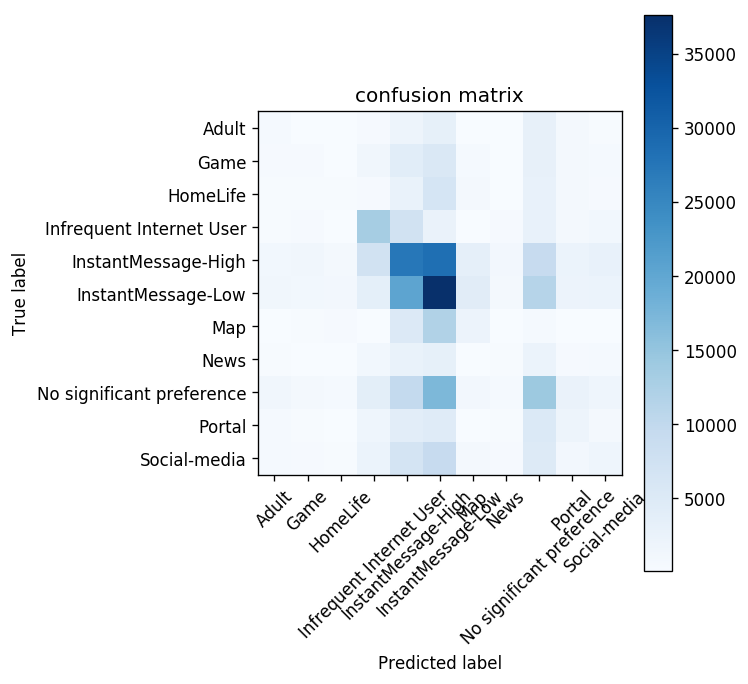

In [133]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6, 6), dpi = 120)
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_, normalize=True, title='confusion matrix')
plt.show()

In [134]:
# for i in range(10):
#     probabilities = model.predict(test_x[i:i+1,:], batch_size=32, verbose=0)
#     probabilities = model.predict(test_x[i:i+1,:])
#     probabilities = model.predict(test_x)
#     probabilities[probabilities>=0.5] = 1
#     probabilities[probabilities<0.5] = 0
#     print(probabilities)